<a href="https://colab.research.google.com/drive/1fynsgOdpmOZGgo7uXYgvHK6PNumwRkXd#scrollTo=ukDADlNJ4Hhi" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting using Prophet (`fbprophet`)

The following coursebook is produced by the team at **Algoritma** for **Data Science Series (DSS) in May 2022 : Time Series Forecasting using Prophet**. The coursebook is intended for a restricted audience only, i.e. the individuals having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

**Algoritma** is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference, etc.

## Introduction

Time series data is one of the most common form of data to be found in every industry. It is considered to be a significant area of interest for most industries: retail, telecommunication, logistic, engineering, finance, and socio-economic. Time series analysis aims to extract the underlying components of a time series to better understand the nature of the data. In this workshop we will tackle a common industry case of business sales.

## Training Objectives

- Python Basic Programming  
  - Setting up Anaconda Environment
  - Variables
- DataFrame,Data Types and Data Wrangling
  - Working with DataFrames
  - Data Types
  - Groupby Aggregation
  - Conditional Subsetting
- Working with Time Series
  - Data Preprocessing
  - Visualization: Multiple vs Multivariate Time Series
- Modeling using `fbprophet`
  - Baseline Model
  - Trend Component
  - Seasonality Component
  - Holiday Effects
  - [optional] Adding Regressors
- Forecasting Evaluation
  - Train-Test Split
  - Evaluation Metrics: MAPE
  - Expanding Window Cross Validation
- Hyperparameter Tuning

## Python Basic Programming
### Setting up Anaconda Environment

**How to create a new virtual environment:**

1. Open Anaconda Prompt

2. Create new virtual environment with:
    ```
    conda create -n <ENV_NAME> python=<PYTHON_VERSION>
    ```
    For example: `conda create -n dss_prophet python=3.8`


3. Activate the new virtual environment witg:
    ```
    conda activate <ENV_NAME>
    ```
    For example: `conda activate dss_prophet`
    
4. Create new kernel:
    ```
    pip install ipykernel
    python -m ipykernel install --user --name=<ENV_NAME>
    ```

5. Install required libraries:
    ```
    pip install <PACKAGE_NAME>
    ```
    or
    ```
    conda install <PACKAGE_NAME>
    ```
    For example: `pip install pandas`

### Variables and Keywords
Let's take a step back and complete our fundamental building blocks: variables.

A variable is used in order for us to store a value. So the next time you need to use it, you will refer to the variable you have created before:

In [1]:
dss_name = "Data Science Series : Time Series Forecasting using Prophet"
print(dss_name)

Data Science Series : Time Series Forecasting using Prophet


Thing to note here, like other programming languages, Python is **case-sensitive**, so `dss_name` and `DSS_Name` are  different symbols and will point to different variables.

In [2]:
# dss_name == DSS_Name # try to uncomment this, becauce this code will raise an error

In [3]:
dss_name == dss_name

True

Our previous code returned `True` as the output. Try to create a new variable and use `True` as the variable name, then see what happen.

> SyntaxError: can't assign to keyword

In [4]:
## code here



A couple of things to note here. `True`, along with its opposite, `False` are among a reserved list of vocabulary referred to as **Python Keywords**. We cannot use keyword as variable name, function name or assign values to them, essentially treating them as an identifier. 

Interestingly, all python keywords except **True**, **False** and **None** are in lowercase and they must be written as it is. As of Python 3.7 (latest version of Python as of this writing), there are 33 keywords:

`True`, `False`, `None`, `and`, `as`, `assert`, `break`, `class`, `continue`, `def`, `del`, `elif`, `else`
`except`, `finally`, `for`, `from`, `global`, `if`, `import`, `in`, `is`, `lambda`, `nonlocal`, `not`, `or`, `pass`
`raise`, `return`, `try`, `while`, `with`, `yield`

## DataFrame,Data Types and Data Wrangling

### Working with Dataframes

We will start off by learning about a powerful Python data analysis library by the name of `pandas`. Its official documentation introduces itself as the "fundamental high-level building block for doing practical, real world data analysis in Python", and strive to do so by implementing many of the key data manipulation functionalities in R. This makes `pandas` a core member of many Python-based scientific computing environments.

From its [official documentation](https://pandas.pydata.org):

> Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

To use `pandas`, we will use Python's `import` function. Once imported, all `pandas` function can be accessed using the *pandas.function_name* notation.

In [5]:
import pandas as pd
print(pd.__version__)

1.4.2


In this course, we will be using provided data from one of the largest Russian software firms - 1C Company and is made available through [Kaggle platform](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview). This is a good example case of data since it contains seasonality and a particular 'noise' in several data when special occurences happened.

In [6]:
sales = pd.read_csv('data_input/sales_train.csv')

Perform top 5 observation from `sales` DataFrame using `.head()`

In [7]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Perform last 5 observation from `sales` DataFrame using `.head()`

In [8]:
sales.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


Get detail information from `sales` DataFrame using `.info()`

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


Some insights we can get from the output are:

- The data consist of 2,935,849 observations (or rows)
- It has 6 variables (or columns)
- The following are the glossary provided in the Kaggle platform:
  - `date` is the date format provided in **dd.mm.yyyy** format
  - `date_block_num` is a consecutive month number used for convenience (January 2013 is 0, February 2013 is 1, and so on)
  - `shop_id` is the unique identifier of the shop
  - `item_id` is the unique identifier of the product
  - `item_price` is the price of the item on the specified date
  - `item_cnt_day` is the number of products sold on the specified date

The variable of interest that we are trying to predict is the **`item_cnt_day` and `item_price`**, which we'll see how to analyze the business demand from the sales record.

### Data Types

When we call `pd.read_csv()` earlier, `pandas` will try to infer data types from the values in each column. Sometimes, it get it right but more often that not, a data analyst's intervention is required. In the following sub-section, we'll learn about various techniques an analyst have at his/her disposal when it comes to the treatment of pandas data types.

In [10]:
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

The result above perform an information about data types in every columns from `sales` DataFrame. Based on business knowledge, we know that `date` variable not in the right data types. This process is known as **implicit coercion** where date values are forced into one type of class based on the most general value existing. So, we need to transform `date` variables into `datetime64` data types :

In [11]:
sales['date'].astype('datetime64')

C:\Users\dyahn\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dyahn\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dyahn\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dyahn\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1063: UserWarn

0         2013-02-01
1         2013-03-01
2         2013-05-01
3         2013-06-01
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-09-10
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-03-10
Name: date, Length: 2935849, dtype: datetime64[ns]

⚠️ The legal and cultural expectations for datetime format may vary between countries. In Indonesia for example, most people are used to storing dates in DMY order. `pandas` will infer date as a **month first** order by default. Since the sales `date` is stored in **dd.mm.yyyy** format.

Take a look on the third observation below; `pandas` converts it to 2nd January while the actual data represents February 1st.

In [12]:
date = pd.Series(['30-01-2021', '31-01-2021', '01-02-2021', '02-02-2021'])

In [13]:
date.astype('datetime64')

C:\Users\dyahn\AppData\Roaming\Python\Python38\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '30-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\dyahn\AppData\Roaming\Python\Python38\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '31-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,


0   2021-01-30
1   2021-01-31
2   2021-01-02
3   2021-02-02
dtype: datetime64[ns]

To overcome those behaviour we need to change data type using `pd.to_datetime()` method and have to specify parameter **`dayfirst=True`** inside .

In [14]:
pd.to_datetime(date, dayfirst = True)

0   2021-01-30
1   2021-01-31
2   2021-02-01
3   2021-02-02
dtype: datetime64[ns]

In [15]:
sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

**[OPTIONAL] Example of other Data Types in `pandas`**

In [16]:
employees = pd.DataFrame({
    'name': ['Anita', 'Brian'],
    'age': [34, 29],
    'joined': [pd.Timestamp('20190410'), pd.Timestamp('20171128')],
    'degree': [True, False],
    'hourlyrate': [35.5, 29],
    'division': ['HR', 'Product']
})
employees

,name,age,joined,degree,hourlyrate,division
0,Anita,34,2019-04-10,True,35.5,HR
1,Brian,29,2017-11-28,False,29.0,Product


In [17]:
employees.dtypes

name                  object
age                    int64
joined        datetime64[ns]
degree                  bool
hourlyrate           float64
division              object
dtype: object

Let's go through the columns and their data types from the above `DataFrame`:

- `name` [`object`]: store text values
- `age` [`int`]: integer values
- `joined` [`datetime`]: date and time values
- `degree` [`bool`]: True/False values
- `hourlyrate` [`float`]: floating point values
- `division` [`object`]: store text values

**Summary Data Types in `pandas` DataFrame:**

| Pandas dtype  | Python type  | NumPy type                                                     | Usage                                        |
|---------------|--------------|----------------------------------------------------------------|----------------------------------------------|
| object        | str or mixed | string_, unicode_, mixed types                                 | Text or mixed numeric and non-numeric values |
| int64         | int          | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers                              |
| float64       | float        | float_, float16, float32, float64                              | Floating point numbers                       |
| bool          | bool         | bool_                                                          | True/False values                            |
| datetime64    | NA           | datetime64[ns]                                                 | Date and time values                         |
| timedelta[ns] | NA           | NA                                                             | Differences between two datetimes            |
| category      | NA           | NA                                                             | Finite list of text values                   |

Referensi: [Overview of Pandas Data Types](https://pbpython.com/pandas_dtypes.html)

### GroupBy Aggregation

Previously we already perform several information from DataFrame using `head()` and `tail()`, both will provide you with the top 5 and last 5 records of our data frame. This way, you can get a better sense of how your data looks like in a tabular form. Now let’s use another technique to get a better picture of our data. Say we want to know how many unique `shop_id` are there. A very simple technique to create a contingency table in `pandas` is by using the `value_counts()` function which will count the occurrence of each unique value in a series. Since we are focusing on the `shop_id` column, we’d like to extract the series within our data frame, to do that we shall use subsetting method using `['']` and provide the column name inside to take the entire value in `shop_id` column:

In [18]:
sales['shop_id'].head()

0    59
1    25
2    25
3    25
4    25
Name: shop_id, dtype: int64

The function above will take the first 5 value of our `shop_id` column. Now let’s get back to returning the count value of each unique shop using `.value_counts()` function:

In [19]:
sales['shop_id'].value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64

The output gives us a set of output showing the number of occurrence for each shop’s records. For example, the shop with the id 0 has a total of 9857 records, the shop with id 1 has a total of 5,678 records and so on. This could be handy to get to know which store has the most sales record in our overall data. Now let’s take the contingency table a further. I shall use the `.groupby()` to extract the same result as our `.value_counts()` function:

In [20]:
sales.groupby(by='shop_id').size()

shop_id
0       9857
1       5678
2      25991
3      25532
4      38242
5      38179
6      82663
7      58076
8       3412
9       3751
10     21397
11       499
12     34694
13     17824
14     36979
15     59511
16     52734
17     22950
18     53227
19     63911
20      1792
21     58133
22     45434
23      6963
24     53032
25    186104
26     53910
27    105366
28    142234
29     49225
30     50860
31    235636
32      7947
33      5027
34      5752
35     58445
36       306
37     39638
38     46013
39     13440
40      4257
41     41967
42    109253
43     39282
44     39530
45     35891
46     66321
47     56695
48     21612
49     15849
50     65173
51     44433
52     43502
53     52921
54    143480
55     34769
56     69573
57    117428
58     71441
59     42108
dtype: int64

**Dive Deeper :**

Using `.groupby()` and it's aggregation, try to perform total number of product sold (`item_cnt_day`) from each `shop_id`.

In [21]:
## code here



### Conditional Subsetting

Now before we moving on into preparing our time series data, I would like to introduce conditional subsetting method in order to select specific information from our data. Say, I want to perform specific information from `shop_id` 0 :

In [22]:
sales[sales['shop_id'] == 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
37589,2013-01-12,0,0,11059,73.0,1.0
37590,2013-01-22,0,0,11059,73.0,1.0
37591,2013-01-26,0,0,11059,73.0,1.0
37592,2013-01-12,0,0,11347,170.0,1.0
37593,2013-01-22,0,0,11347,170.0,1.0
...,...,...,...,...,...,...
183257,2013-02-22,1,0,13460,1228.0,2.0
183258,2013-02-21,1,0,13460,1228.0,1.0
183259,2013-02-20,1,0,13460,1228.0,1.0
183260,2013-02-17,1,0,13460,1228.0,1.0


Perform observation which have `item_cnt_day` more than 100

In [23]:
sales[sales['item_cnt_day'] > 100]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
566159,2013-06-11,5,12,2808,999.000000,200.0
620237,2013-06-14,5,42,16787,2559.746729,107.0
836296,2013-08-29,7,12,2808,999.000000,150.0
845690,2013-09-18,8,42,3732,2521.211982,217.0
845703,2013-09-18,8,42,3734,2520.730769,104.0
...,...,...,...,...,...,...
2864262,2015-09-28,32,12,9248,1500.000000,139.0
2864264,2015-09-30,32,12,9244,1296.273292,161.0
2909401,2015-10-14,33,12,20949,4.000000,500.0
2909818,2015-10-28,33,12,11373,0.908714,2169.0


**Dive Deeper :**

Perform observation from `shop_id` 0 and have `item_cnt_day` more than 10

In [24]:
## code here



## Working with Time Series
### Data Preparation

Time series data is defined as data observations that are collected at **regular time intervals**. In this case, we are talking about software sales **daily** data.

We have to make sure our data is ready to be fitted into models, such as:

- Convert `date` column data type from `object` to `datetime64`
- Sort the data ascending by `date` column
- Feature engineering of `total_revenue`, which will be forecasted

In [25]:
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [26]:
sales.sort_values('date', inplace=True)
sales['total_revenue'] = sales['item_price'] * sales['item_cnt_day']

Next, let's check the `date` range of `sales` data. Turns out it ranges from January 1st, 2013 to October 31st, 2015.

In [27]:
sales['date'].describe()

<ipython-input-27-4369fa238781>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales['date'].describe()


count                 2935849
unique                   1034
top       2013-12-28 00:00:00
freq                     9434
first     2013-01-01 00:00:00
last      2015-10-31 00:00:00
Name: date, dtype: object

We are interested in analyzing the most popular shop (`shop_id`) of our `sales` data. The popularity of a shop is defined by the number of transaction that occur. Let's create a frequency table using `.value_counts()` as follows:

In [28]:
top_3_shop = sales['shop_id'].value_counts().head(3)
top_3_shop

31    235636
25    186104
54    143480
Name: shop_id, dtype: int64

We have gain the information that **shop 31, 25, and 54** are the top three shops with the most record sales. Say we would like to analyze their time series attribute. To do that, we can apply **conditional subsetting** (filter) to `sales` data.

In [29]:
sales[(sales['shop_id'] == 31) | (sales['shop_id'] == 54) | (sales['shop_id'] == 25)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_revenue
84820,2013-01-01,0,54,12370,149.0,1.0,149.0
85870,2013-01-01,0,54,13431,11489.7,1.0,11489.7
87843,2013-01-01,0,54,8709,349.0,1.0,349.0
76711,2013-01-01,0,54,20144,249.0,1.0,249.0
87341,2013-01-01,0,54,10458,298.0,1.0,298.0
...,...,...,...,...,...,...,...
2933611,2015-10-31,33,25,16159,799.0,1.0,799.0
2933568,2015-10-31,33,25,16046,499.0,1.0,499.0
2933574,2015-10-31,33,25,16073,599.0,1.0,599.0
2933635,2015-10-31,33,25,16158,599.0,1.0,599.0


On in a compact way we can use `isin()` method :

In [30]:
sales_top_3_shop = sales[sales['shop_id'].isin(top_3_shop.index)]
sales_top_3_shop.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_revenue
84820,2013-01-01,0,54,12370,149.0,1.0,149.0
85870,2013-01-01,0,54,13431,11489.7,1.0,11489.7
87843,2013-01-01,0,54,8709,349.0,1.0,349.0
76711,2013-01-01,0,54,20144,249.0,1.0,249.0
87341,2013-01-01,0,54,10458,298.0,1.0,298.0


Now let’s highlight again the most important definition of a time series: it is **an observation** that is recorded at a regular time interval. Notice that the records has a multiple samples of the same day. This must mean that our data frame violates the rules of a time series where the records is sampled multiple time a day. Based on the structure of our data, it is recording the sales of different items within the same day. An important aspect in preparing a time series is called a **data aggregation**, where we need to aggregate the sales from one day into one records. Now let’s take a look at the codes:

In [31]:
daily_sales = sales_top_3_shop.groupby(['date', 'shop_id']) \
                [['item_cnt_day', 'total_revenue']] \
                .sum().reset_index() \
                .rename(columns={'item_cnt_day': 'total_qty'})
daily_sales.head()

,date,shop_id,total_qty,total_revenue
0,2013-01-01,54,415.0,316557.00
1,2013-01-02,25,568.0,345174.13
2,2013-01-02,31,568.0,396376.10
3,2013-01-02,54,709.0,519336.00
4,2013-01-03,25,375.0,249421.00


Note that in performing data aggregation, we can only transform a more frequent data sampling to a more sparse frequency, for example:

- Hourly to daily
- Daily to weekly
- Daily to monthly
- Monthly to quarterly, and so on

### Visualization: Multiple vs Multivariate Time Series

One of an important aspect in time series analysis is performing a visual exploratory analysis. Python is known for its graphical capabilities and has a very popular visualization package called **`matplotlib` and `seaborn`**. Let’s take our `daily_sales` data frame we have created earlier and observe through the visualization.

⚠️ There is a misconception between multiple and multivariate time series. Here are the definitions for each term:

- Multiple time series: There is **one variable** from **multiple objects** being observed from time to time.

- Multivariate Time series: There are **multiple variables** from only **one object** being observed from time to time. Typically for such series, the variables are closely interrelated.

In [32]:
# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#### Multiple Time Series

In our case, multiple time series is when we observed the fluctuation of `total_qty` over time, from the top three shops.

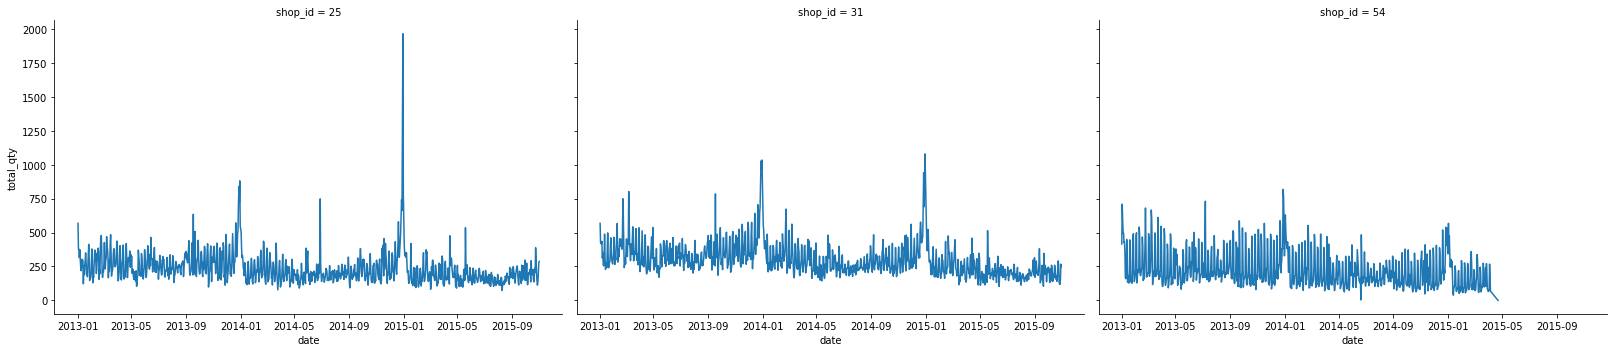

In [33]:
sns.relplot(data=daily_sales, kind='line',
            x='date', y='total_qty', col='shop_id', aspect=1.5)
plt.show()

From the visualization we can conclude that the fluctuation of `total_qty` is very distinct for each shop. There are some extreme spikes on `shop_id` 25 and 31 at the end of each year, while `shop_id` 54 doesn't have any spike. 

#### Multivariate Time Series

In our case, multivariate time series is when we observed the fluctuation of `total_qty` and `total_revenue` over time, from only `shop_id` 31. Notice that we perform conditional subsetting on `daily_sales` to produce `daily_sales_31`.

In [34]:
daily_sales_31 = daily_sales[daily_sales['shop_id'] == 31].reset_index(drop=True)

Create visualization :

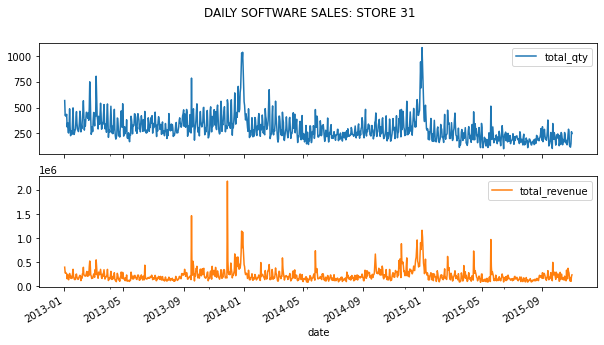

In [35]:
daily_sales_31.set_index('date')[['total_qty', 'total_revenue']].plot(subplots=True,figsize=(10, 5))
plt.suptitle('DAILY SOFTWARE SALES: STORE 31')
plt.show()

In [36]:
daily_sales_31.head()

,date,shop_id,total_qty,total_revenue
0,2013-01-02,31,568.0,396376.10
1,2013-01-03,31,423.0,276933.11
2,2013-01-04,31,431.0,286408.00
3,2013-01-05,31,415.0,273245.00
4,2013-01-06,31,435.0,260775.00


From the visualization we can conclude that the fluctuation of `total_qty` and `total_revenue` is quite similar for `shop_id` 31. In fact, from the business perspective, variable quantity and revenue are closely related to each other. When the `total_qty` sold increases, logically, the `total_revenue` will also increases.

## Modeling using `fbprophet`

A very fundamental part in understanding time series is to be able to **decompose** its underlying components. A classic way in describing a time series is using **General Additive Model (GAM)**. This definition describes time series as a summation of its components. As a starter, we will define time series with 3 different components:

- Trend ($T$): Long term movement in its mean
- Seasonality ($S$): Repeated seasonal effects
- Residuals ($E$): Irregular components or random fluctuations not described by trend and seasonality

The idea of GAM is that each of them is added to describe our time series:

$Y(t) = T(t) + S(t) + E(t)$

When we are discussing time series forecasting there is one main assumption that needs to be remembered: **We assume correlation among successive observations**. Means that the idea of performing a forecasting for a time series is based on its past behavior. So in order to forecast the future values, we will take a look at any existing trend and seasonality of the time series and use it to generate future values.

Prophet enhanced the classical trend and seasonality components by adding a **holiday effect**. It will try to model the effects of holidays which occur on some dates and has been proven to be really useful in many cases. Take, for example: Lebaran Season. In Indonesia, it is really common to have an effect on Lebaran season. The effect, however, is a bit different from a classic seasonality effect because it shows the characteristics of an **irregular schedule**.

### Baseline Model

#### Prepare the data

To use the `fbprophet` package, we first need to prepare our time series data into a specific format data frame required by the package. The data frame requires 2 columns:

- `ds`: the time stamp column, stored in `datetime64` data type
- `y`: the value to be forecasted

In this example, we will be using the `total_qty` as the value to be forecasted.

In [37]:
daily_total_qty = daily_sales_31[['date', 'total_qty']].rename(
    columns={'date': 'ds',
             'total_qty': 'y'})

daily_total_qty.head()

,ds,y
0,2013-01-02,568.0
1,2013-01-03,423.0
2,2013-01-04,431.0
3,2013-01-05,415.0
4,2013-01-06,435.0


#### Fitting Model

Let’s initiate a `fbprophet` object using `Prophet()` and fit the `daily_total_qty` data. The idea of fitting a time series model is to extract the pattern information of a time series in order to perform a forecasting over the specified period of time.

In [38]:
# load the library
from fbprophet import Prophet
# fit model
model_31 = Prophet()
model_31.fit(daily_total_qty)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


#### Forecasting

Based on the existing data, we'd like to perform a forecasting for **1 years into the future**. To do that, we will need to first prepare a data frame that consist of the future time stamp range we'd like to forecast. Luckily, `fbprophet` has provided `.make_future_dataframe()` method that help us to prepare the data:

In [39]:
future_31 = model_31.make_future_dataframe(periods=365, freq='D')
future_31.tail()

,ds
1391,2016-10-26
1392,2016-10-27
1393,2016-10-28
1394,2016-10-29
1395,2016-10-30


Now we have acquired a new `future_31` data frame that consist of a date span of **the beginning of a time series to 365 days into the future**. We will then use this data frame is to perform the forecasting by using `.predict()` method of our `model_31`:

In [40]:
forecast_31 = model_31.predict(future_31)

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Perform top 5 observation from `forecast_31`:

In [41]:
## code here



Select several information from forecasting result :

In [42]:
forecast_31[['ds', 'trend', 'weekly', 'yearly', 'yhat']]

,ds,trend,weekly,yearly,yhat
0,2013-01-02,375.977592,-32.833532,234.639163,577.783223
1,2013-01-03,375.905617,-26.062064,215.112416,564.955968
2,2013-01-04,375.833641,55.637611,194.002591,625.473843
3,2013-01-05,375.761665,82.003676,171.653421,629.418762
4,2013-01-06,375.689689,-2.450989,148.426721,521.665420
...,...,...,...,...,...
1391,2016-10-26,153.927707,-32.833532,-32.509503,88.584672
1392,2016-10-27,153.747309,-26.062064,-30.546694,97.138550
1393,2016-10-28,153.566911,55.637611,-27.659737,181.544786
1394,2016-10-29,153.386513,82.003676,-23.859199,211.530990


Recall that in General Additive Model, we use time series components and perform a summation of all components. In this case, we can see that the model is extracting 3 types of components: `trend`, `weekly` seasonality, and `yearly` seasonality. Means, in forecasting future values it will use the following formula:

$yhat(t) = T(t) + S_{weekly}(t) + S_{yearly}(t)$

We can manually confirm from `forecast_31` that the column `yhat` = `trend` + `weekly` + `yearly`.

In [43]:
forecast_31['trend'] + forecast_31['weekly'] + forecast_31['yearly']

0       577.783223
1       564.955968
2       625.473843
3       629.418762
4       521.665420
           ...    
1391     88.584672
1392     97.138550
1393    181.544786
1394    211.530990
1395    131.573812
Length: 1396, dtype: float64

In [44]:
forecast_31['yhat']

0       577.783223
1       564.955968
2       625.473843
3       629.418762
4       521.665420
           ...    
1391     88.584672
1392     97.138550
1393    181.544786
1394    211.530990
1395    131.573812
Name: yhat, Length: 1396, dtype: float64

#### Visualize

Now, observe how `.plot()` method take our model_31, and newly created forecast_31 object to create a `matplotlib` object that shows the forecasting result. The black points in the plot shows the **actual** time series, and the blue line shows the **fitted** time series along with its forecasted values 365 days into the future.

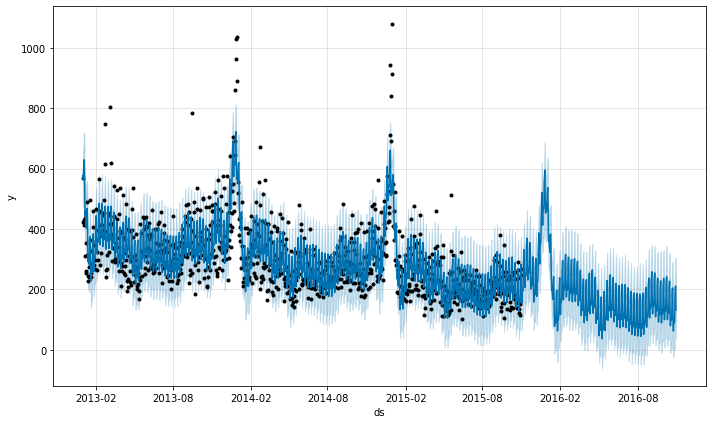

In [45]:
fig = model_31.plot(forecast_31)

We can also visualize each of the trend and seasonality components using `.plot_components` method.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


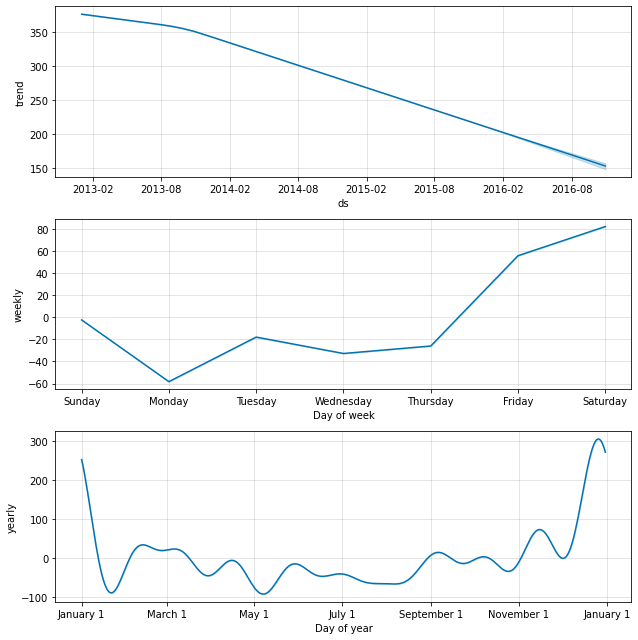

In [46]:
fig = model_31.plot_components(forecast_31)

From the visualization above, we can get insights such as:

- The trend shows that the `total_qty` sold is decreasing from time to time.
- The weekly seasonality shows that sales on weekends are higher than weekdays.
- The yearly seasonality shows that sales peaked at the end of the year.

#### [Optional] Interactive Visualization

An interactive figure of the forecast and components can be created with `plotly`. You will need to install `plotly` 4.0 or above separately, as it will not by default be installed with `fbprophet`. You will also need to install the `notebook` and `ipywidgets` packages

In [47]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [48]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_31, forecast_31)

In [49]:
plot_components_plotly(model_31, forecast_31)

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Trend Component

The trend components of our model, as plotted using `.plot_components()` method is producing a decreasing trend over the year. Trend is defined as a long term movement of average over the year. The methods that is implemented by Prophet is by default a **linear model** as shown below:

<ipython-input-50-5a4dea2f6297>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



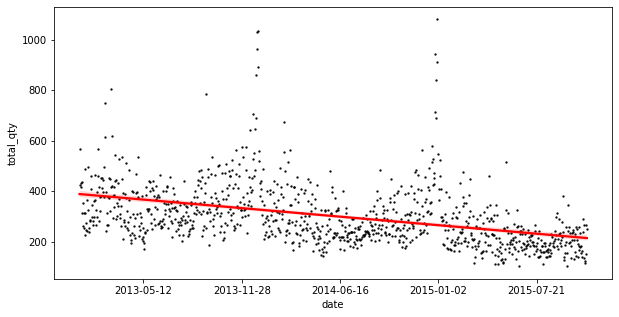

In [50]:
#@title
# for illustration purposes only
from datetime import date

## prepare data
daily_sales_31_copy = daily_sales_31.copy()
daily_sales_31_copy['date_ordinal'] = daily_sales_31_copy['date'].apply(lambda date: date.toordinal())

## visualize regression line
plt.figure(figsize=(10, 5))
ax = sns.regplot(x='date_ordinal', y='total_qty', data=daily_sales_31_copy,
            scatter_kws={'color': 'black', 's': 2},
            line_kws={'color': 'red'})
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
plt.xlabel('date')
plt.show()

In [51]:
daily_sales_31_copy

,date,shop_id,total_qty,total_revenue,date_ordinal
0,2013-01-02,31,568.0,396376.10,734870
1,2013-01-03,31,423.0,276933.11,734871
2,2013-01-04,31,431.0,286408.00,734872
3,2013-01-05,31,415.0,273245.00,734873
4,2013-01-06,31,435.0,260775.00,734874
...,...,...,...,...,...
1026,2015-10-27,31,123.0,111851.00,735898
1027,2015-10-28,31,117.0,180557.00,735899
1028,2015-10-29,31,152.0,103456.00,735900
1029,2015-10-30,31,267.0,204317.00,735901


**[OPTIONAL]**

The linear model will take a straight line across the x axis using the ordinary least square method, means it tries to produce the least difference between the line and the actual demand value resulting in the long-term “average” value given a time point t accross the date. Linear model or linear regression is a common statistical tool to model a numerical value. The formula of a linear regression is as follow:

$$y=mx+C$$

In our time series context, where we try to model our trend component, y equals to the Trend, m equals the difference for every change of time point and C for the intercept. In a more specific manner we could say that:

$$T(date)=m(date)+C$$

To illustrate the slope part of our trend which is an important part in understanding the trend, we can create the model using `ols()` function from `statsmodels` library like follow:

In [52]:
# import the library
import statsmodels.api as sm

# define predictor and target variable
X = daily_sales_31_copy['date_ordinal']
y = daily_sales_31_copy['total_qty']

# build ols model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y, X_train_sm).fit()

# printing the parameters
lr.params

const           124413.733302
date_ordinal        -0.168772
dtype: float64

The coefficients of this model will be translated into:

$$demand.in.qty=−0.17date+124413.733$$

The first one is our slope or m, which is calculated to be -0.17, so every increase of 1 unit of date, (in this case daily), the demand value decreases by 0.17. This shows a negative relationship between dates and demand and lead us to believe that there is indeed a downward trend for our demand time series. 

#### Automatic Changepoint Detection

Prophet however implements a changepoint detection which tries to automatically detect a point where the slope has a significant change rate. It will tries to split the series using several points where the trend slope is calculated for each range.

By default, `prophet` specifies 25 potential changepoints (`n_changepoints=25`) which are placed uniformly on the first 80% of the time series (`changepoint_range=0.8`).

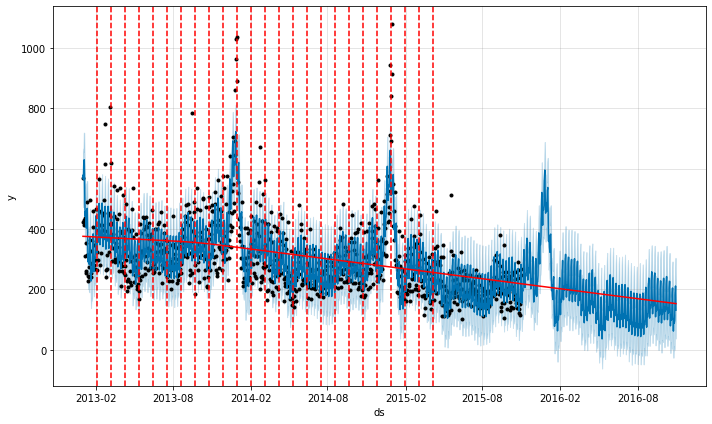

In [53]:
#@title
# for illustration purposes only, threshold = 0
from fbprophet.plot import add_changepoints_to_plot
fig = model_31.plot(forecast_31)
a = add_changepoints_to_plot(fig.gca(), model_31, forecast_31, threshold=0)

From the 25 potential changepoints, it will then calculate the magnitude of the slope change rate and decided the **significant** change rate. The model detected **3 significant changepoints** and separate the series into **4 different trend slopes**.

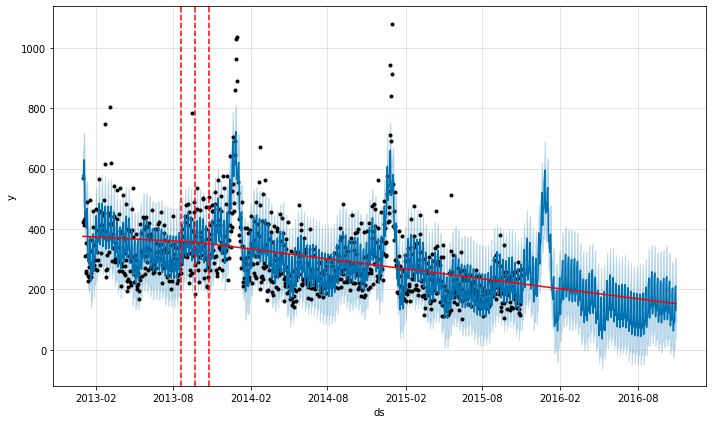

In [54]:
fig = model_31.plot(forecast_31)
a = add_changepoints_to_plot(fig.gca(), model_31, forecast_31)

#### Adjusting Trend Flexibility

Prophet provided us a tuning parameter to adjust the detection flexibility:

- `n_changepoints` (default = 25): The number of potential changepoints, **not recommended** to be tuned, this is better tuned by adjusting the regularization (`changepoint_prior_scale`)
- `changepoint_range` (default = 0.8): Proportion of the history in which the trend is allowed to change. Recommended range: [0.8, 0.95]
- `changepoint_prior_scale` (default = 0.05): The flexibility of the trend, and in particular how much the trend changes at the trend changepoints. Recommended range: [0.001, 0.5]

💡 Increasing the default value of the parameter above will give extra flexibility to the trend line (overfitting the training data). On the other hand, decreasing the value will cause the trend to be less flexible (underfitting).

In [55]:
daily_total_qty.head()

,ds,y
0,2013-01-02,568.0
1,2013-01-03,423.0
2,2013-01-04,431.0
3,2013-01-05,415.0
4,2013-01-06,435.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



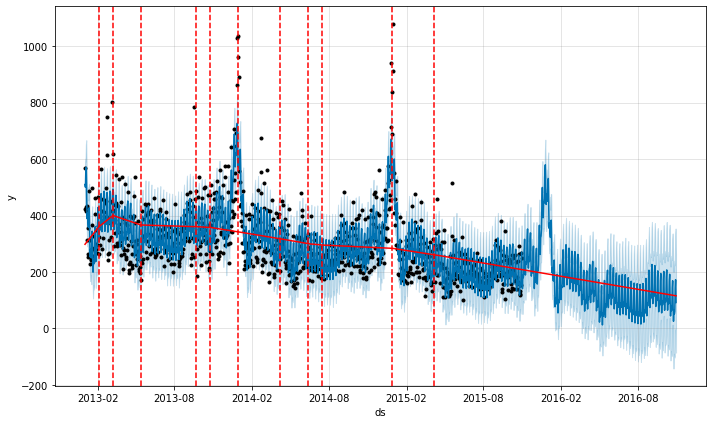

In [56]:
# fitting model
model_tuning_trend = Prophet(
    changepoint_range=0.8, # default = 0.8
    changepoint_prior_scale=0.5 # default = 0.05
    )
model_tuning_trend.fit(daily_total_qty)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

### Seasonality Component

Let’s talk about other time series component, seasonality. We will review the following plot components.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



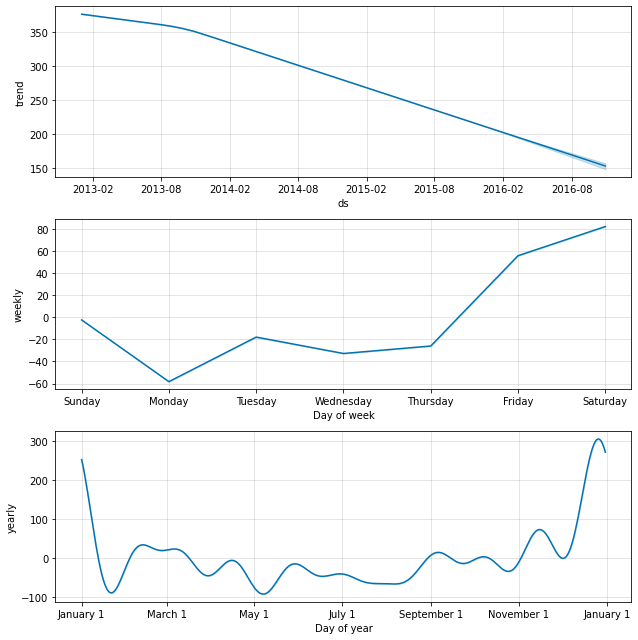

In [57]:
fig = model_31.plot_components(forecast_31)

By default, Prophet will try to determine existing seasonality based on existing data provided. In our case, the data provided is a **daily** data from early 2013 to end 2015.

- Any daily sampled data by default will be detected to have a **weekly seasonality**.
- While **yearly seasonality**, by default will be set as `True` if the provided data has more than 2 years of daily sample.
- The other regular seasonality is a **daily seasonality** which tries to model an hourly pattern of a time series. Since our data does not accommodate hourly data, by default the daily seasonality will be set as `False`.

#### Fourier Order

Prophet uses a Fourier series to approximate the seasonality effect. It is a way of approximating a periodic function as a (possibly infinite) **sum of sine and cosine** functions. 

💡 The number of terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change. Increasing the fourier order will give extra flexibility to the seasonality (overfitting the training data), and vice versa.

Here is an interactive introduction to Fourier: http://www.jezzamon.com/fourier/

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anacond

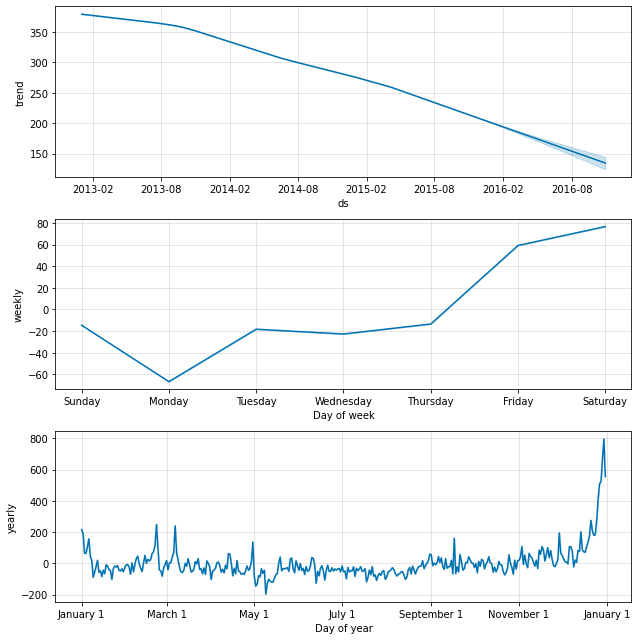

In [58]:
# fitting model
model_tuning_seasonality = Prophet(
    weekly_seasonality=3, # default = 3
    yearly_seasonality=200 # default = 10
    )
model_tuning_seasonality.fit(daily_total_qty)

# forecasting
future = model_tuning_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_seasonality.predict(future)

# visualize
fig = model_tuning_seasonality.plot_components(forecast)

#### Custom Seasonalities

The default provided seasonality modelled by Prophet for a daily sampled data is: weekly and yearly. 

Consider this case: a sales in your business is heavily affected by payday. Most customers tends to buy your product based on the day of the month. Since it did not follow the default seasonality of yearly and weekly, we will need to define a non-regular seasonality. There are two steps we have to do:
1. Remove default seasonality (eg: remove yearly seasonality) by setting `False`
2. Add seasonality (eg: add monthly seasonality) by using `.add_seasonality()` method before fitting the model

We ended up with formula:
$yhat(t) = T(t) + S_{weekly}(t) + \bf{S_{monthly}(t)}$

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anacond

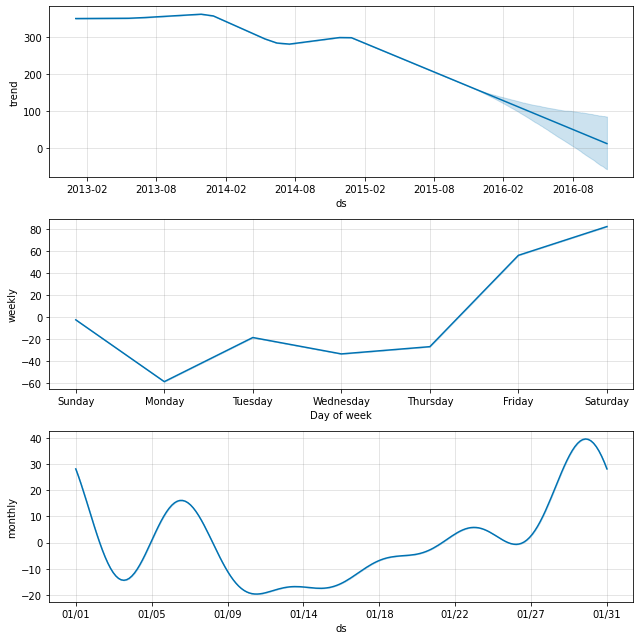

In [59]:
# fitting model
model_custom_seasonality = Prophet(
    yearly_seasonality=False ## remove seasonality
    )
## add seasonality
model_custom_seasonality.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_custom_seasonality.fit(daily_total_qty)

# forecasting
future = model_custom_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_custom_seasonality.predict(future)

# visualize
fig = model_custom_seasonality.plot_components(forecast)

For monthly seasonality, we provided period = 30.5 indicating that there will be non-regular 30.5 frequency in one season of the data. The 30.5 is a common frequency quantifier for monthly seasonality, since there are some months with a total of 30 and 31 (some are 28 or 29).

💡 Recommended Fourier order according to the seasonality:
- weekly seasonality = 3
- monthly seasonality = 5
- yearly seasonality = 10

### Holiday Effects

One of the advantage in using Prophet is the ability to model a holiday effect. This holiday effect is defined as a non-regular effect that needs to be **manually** specified by the user.

#### Modeling Holidays and Special Events

Now let’s take a better look for our data. We could see that **every end of a year**, there is a significant increase of sales which exceeds 800 sales a day.

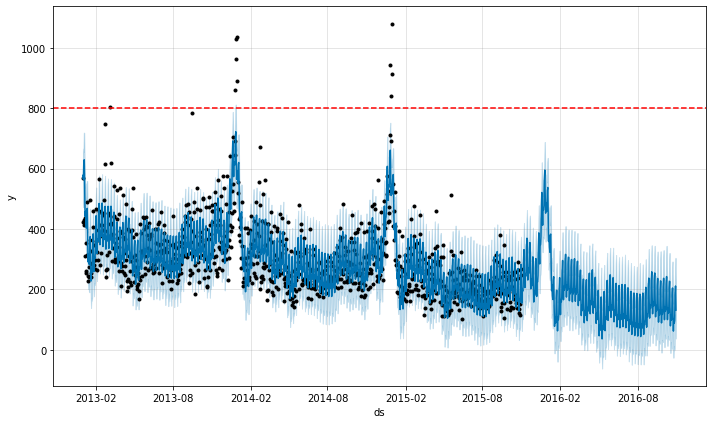

In [60]:
#@title
# for illustration purposes only
fig = model_31.plot(forecast_31)
plt.axhline(y=800, color='red', ls='--')
plt.show()

Table below shows that the relatively large sales mostly happened at the very end of a year between **27th to 31st** December. Now let’s assume that this phenomenon is the result of the **new year eve** where most people spent the remaining budget of their Christmas or End year bonus to buy our goods.

In [61]:
daily_total_qty[daily_total_qty['y'] > 800]

,ds,y
64,2013-03-07,803.0
359,2013-12-27,861.0
360,2013-12-28,1028.0
361,2013-12-29,962.0
362,2013-12-30,1035.0
363,2013-12-31,891.0
723,2014-12-27,942.0
725,2014-12-29,839.0
726,2014-12-30,1080.0
727,2014-12-31,912.0


We'll need to prepare a `holiday` data frame with the following column:

- `holiday`: the holiday unique name identifier
- `ds`: timestamp
- `lower_window`: how many time unit **behind** the holiday that is assumed to to be affected (smaller or equal than zero)
- `upper_window`: how many time unit **after** the holiday that is assumed to be affected (larger or equal to zero)

⚠️ It must include all occurrences of the holiday, both in the **past** (back as far as the historical data go) and in the **future** (out as far as the forecast is being made).

In [62]:
holiday = pd.DataFrame({
    'holiday': 'new_year_eve',
    'ds': pd.to_datetime(['2013-12-31', '2014-12-31', # past date, historical data 
                          '2015-12-31']), # future date, to be forecasted
    'lower_window': -4, # include 27th - 31st December
    'upper_window': 0})
holiday

,holiday,ds,lower_window,upper_window
0,new_year_eve,2013-12-31,-4,0
1,new_year_eve,2014-12-31,-4,0
2,new_year_eve,2015-12-31,-4,0


Once we have prepared our `holiday` data frame, we can pass that into the `Prophet()` class:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



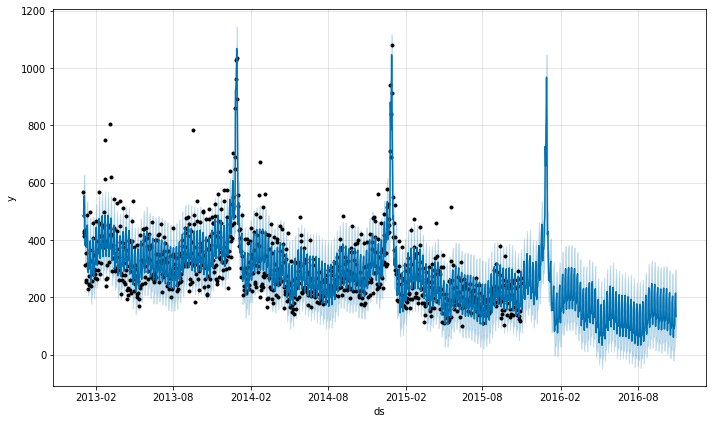

In [63]:
# fitting model
model_holiday = Prophet(holidays=holiday)
model_holiday.fit(daily_total_qty)

# forecasting
future = model_holiday.make_future_dataframe(periods=365, freq='D')
forecast = model_holiday.predict(future)

# visualize
fig = model_holiday.plot(forecast)

Observe how now it has more confidence in capturing the holiday effect on the end of the year instead of relying on the yearly seasonality effect. If we plot the components, we could also get the holiday components listed as one of the time series components:

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



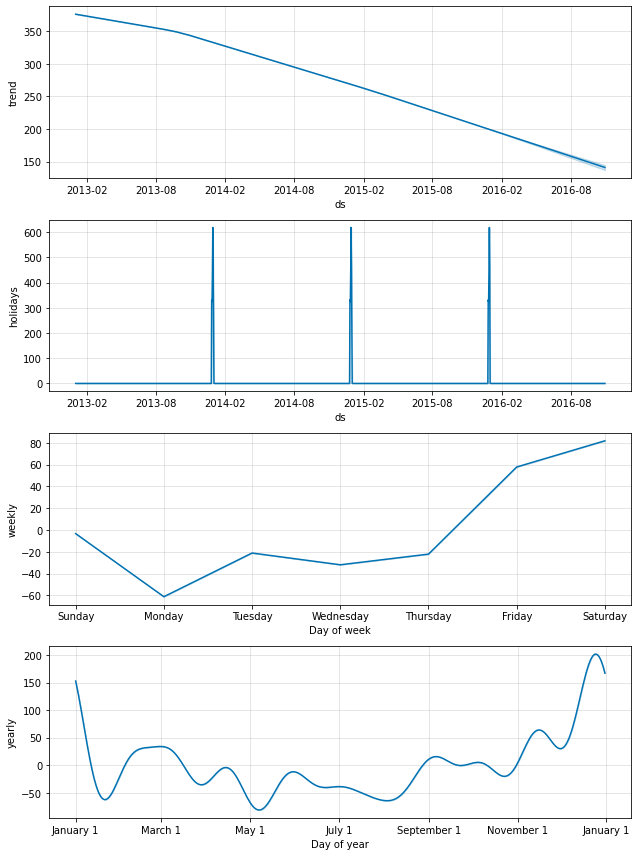

In [64]:
fig = model_holiday.plot_components(forecast)

#### [OPTIONAL] Built-in Country Holidays

We can use a built-in collection of country-specific holidays using the `.add_country_holidays()` method before fitting model. For Indonesia, we can specify parameter `country_name='ID'`.

In [65]:
model_holiday_indo = Prophet()
model_holiday_indo.add_country_holidays(country_name='ID')
model_holiday_indo.fit(daily_total_qty)

model_holiday_indo.train_holiday_names

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



0               New Year's Day
1             Chinese New Year
2        Day of Silence/ Nyepi
3     Ascension of the Prophet
4                    Labor Day
5           Ascension of Jesus
6            Buddha's Birthday
7                  Eid al-Fitr
8             Independence Day
9       Feast of the Sacrifice
10            Islamic New Year
11                   Christmas
12        Birth of the Prophet
dtype: object

💡 We can also manually populate Indonesia holiday by using `hdays` module. This is useful if we want to take a look on the holiday dates and then manually include only certain holidays.

In [66]:
# for illustration purposes only
# Reference: https://github.com/facebook/prophet/blob/master/python/fbprophet/hdays.py
from fbprophet import hdays
holidays_indo = hdays.Indonesia()
holidays_indo._populate(2020)
holidays_indo._populate(2021)
pd.DataFrame([holidays_indo], index=['holiday']).T.rename_axis('ds').reset_index()

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019



,ds,holiday
0,2020-01-01,New Year's Day
1,2020-01-25,Chinese New Year
2,2020-03-22,Ascension of the Prophet
3,2020-05-01,Labor Day
4,2020-05-21,Ascension of Jesus
5,2020-05-07,Buddha's Birthday
6,2020-06-01,Pancasila Day
7,2020-05-25,Eid al-Fitr
8,2020-08-17,Independence Day
9,2020-08-20,Islamic New Year


### [OPTIONAL] Adding Regressors

Additional regressors can be added to the linear part of the model using the `.add_regressor()` method, before fitting model. In this case, we want to forecast `total_revenue` based on its previous revenue components (trend, seasonality, holiday) and also `total_qty` sold as the regressor:

$revenue(t) = T_{revenue}(t) + S_{revenue}(t) + H_{revenue}(t) + \bf{qty(t)}$

⚠️ The extra regressor must be known for both the **history** and for **future** dates. It thus must either be something that has known future values or something that has separately been forecasted with a time series model, such as Prophet. A note of **caution** around this approach: error in the forecast of regressor will produce error in the forecast of target value.



In [67]:
daily_sales_31.head()

,date,shop_id,total_qty,total_revenue
0,2013-01-02,31,568.0,396376.10
1,2013-01-03,31,423.0,276933.11
2,2013-01-04,31,431.0,286408.00
3,2013-01-05,31,415.0,273245.00
4,2013-01-06,31,435.0,260775.00


#### Forecast the Regressor (`total_qty`)

In this section, we separately create a Prophet model to forecast `total_qty`, before we forecast `total_revenue`.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



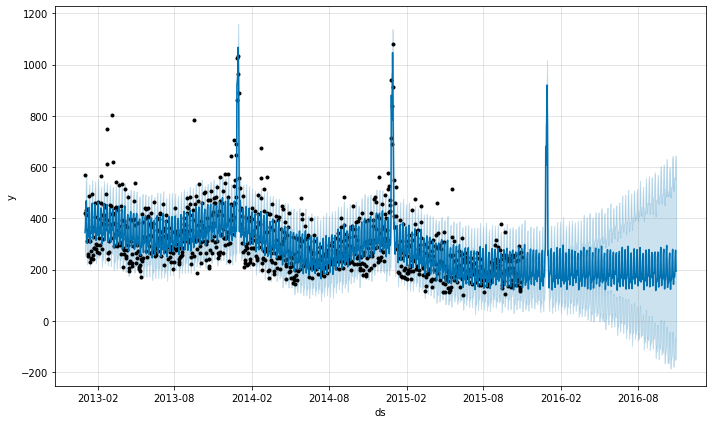

In [68]:
# fitting model
model_total_qty = Prophet(
    n_changepoints=20, # trend flexibility
    changepoint_range=0.9, # trend flexibility
    changepoint_prior_scale=0.25, # trend flexibility
    weekly_seasonality=5, # seasonality fourier order
    yearly_seasonality=False, # remove seasonality
    holidays=holiday # new year eve effects
    )
## add monthly seasonality
model_total_qty.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_total_qty.fit(daily_total_qty)

# forecasting
future = model_total_qty.make_future_dataframe(periods=365, freq='D')
forecast_total_qty = model_total_qty.predict(future)

# visualize
fig = model_total_qty.plot(forecast_total_qty)

The table below shows the forecasted total quantity for the last 365 days (from November 1st, 2015 until October 30th, 2016).

In [69]:
forecasted_total_qty = forecast_total_qty[['ds', 'yhat']].tail(365) \
                        .rename(columns={'yhat': 'total_qty'})
forecasted_total_qty

,ds,total_qty
1031,2015-11-01,193.965860
1032,2015-11-02,129.494136
1033,2015-11-03,165.597606
1034,2015-11-04,159.014801
1035,2015-11-05,179.568316
...,...,...
1391,2016-10-26,170.073386
1392,2016-10-27,175.400610
1393,2016-10-28,251.826111
1394,2016-10-29,275.659701


On the other hand, the table below shows the actual total quantity which we used for training model. We have to rename the column exactly like the previous table.

In [70]:
actual_total_qty = daily_total_qty.rename(columns={'y': 'total_qty'})
actual_total_qty

,ds,total_qty
0,2013-01-02,568.0
1,2013-01-03,423.0
2,2013-01-04,431.0
3,2013-01-05,415.0
4,2013-01-06,435.0
...,...,...
1026,2015-10-27,123.0
1027,2015-10-28,117.0
1028,2015-10-29,152.0
1029,2015-10-30,267.0


Now, we have to prepare concatenated data of `total_qty` as the regressor values of `total_revenue`:

- First 1031 observations: actual values of `total_qty`
- Last 365 observations: forecasted values of `total_qty`

In [71]:
future_with_regressor = pd.concat([actual_total_qty, forecasted_total_qty])
future_with_regressor

,ds,total_qty
0,2013-01-02,568.000000
1,2013-01-03,423.000000
2,2013-01-04,431.000000
3,2013-01-05,415.000000
4,2013-01-06,435.000000
...,...,...
1391,2016-10-26,170.073386
1392,2016-10-27,175.400610
1393,2016-10-28,251.826111
1394,2016-10-29,275.659701


#### Forecast the Target Variable (`total_revenue`)

Next, we create a Prophet model to forecast `total_revenue`, using `total_qty` as the regressor. Make sure to rename the date as `ds` and the value to be forecasted as `y`.

In [72]:
daily_total_revenue = daily_sales_31[['date', 'total_revenue', 'total_qty']].rename(
    columns={'date': 'ds',
             'total_revenue': 'y'})

daily_total_revenue.head()

,ds,y,total_qty
0,2013-01-02,396376.10,568.0
1,2013-01-03,276933.11,423.0
2,2013-01-04,286408.00,431.0
3,2013-01-05,273245.00,415.0
4,2013-01-06,260775.00,435.0


During fitting a model with regressor, make sure:
- Apply `.add_regressor()` method before fitting
- Forecast the value using `future_with_regressor` data frame that we have prepared before, containing `ds` and the regressor values

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anacond

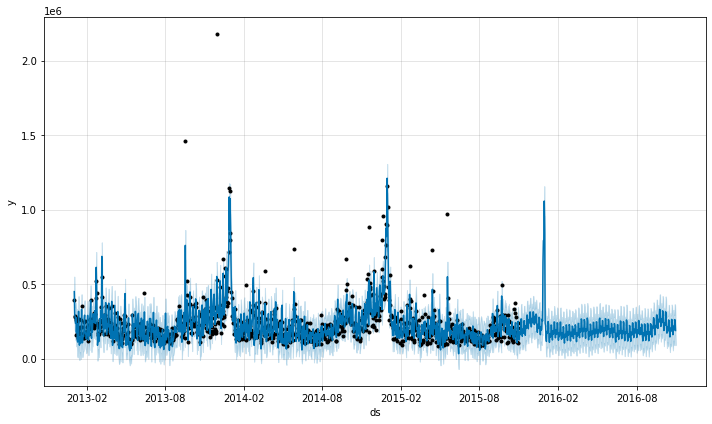

In [73]:
# fitting model
model_total_revenue = Prophet(
    holidays=holiday # new year eve effects
    )
## add regressor
model_total_revenue.add_regressor('total_qty')
model_total_revenue.fit(daily_total_revenue)

# forecasting
## use dataframe with regressor, instead of just `ds` column
forecast_total_revenue = model_total_revenue.predict(future_with_regressor)

# visualize
fig = model_total_revenue.plot(forecast_total_revenue)

If we plot the components, we could also get the extra regressors components listed as one of the time series components:

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



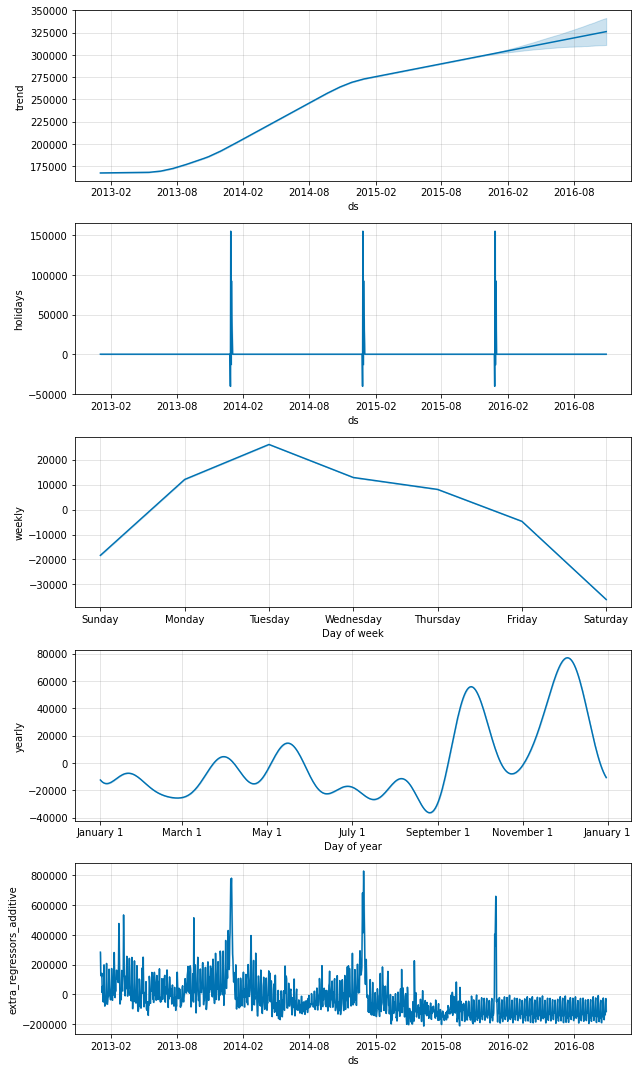

In [74]:
fig = model_total_revenue.plot_components(forecast_total_revenue)

⚠️ By adding regressors, we lose the ability to interpret the other components (trend, seasonality, holiday) due to the fluctuation of the extra regressor value.

## Forecasting Evaluation

Recall how we performed a visual analysis on how the performance of our forecasting model earlier. The technique was in fact, a widely used technique for model cross-validation. It involves splitting our data into two parts:

- Train data is used to train our time series model in order to acquire the underlying patterns such as trend and seasonality.
- Test data is purposely being kept for us to perform a cross-validation and see how our model perform on an **unseen data**.

The objective is quite clear, is that we are able to acquire a glimpse of what kind of error are we going to expect for the model.

### Train-Test Split

Recall that our data has the range of early 2013 to end 2015. Say, we are going to save the records of 2015 as a test data and use the rest for model training. The points in red will now be treated as unseen data and will not be passed in to our Prophet model.

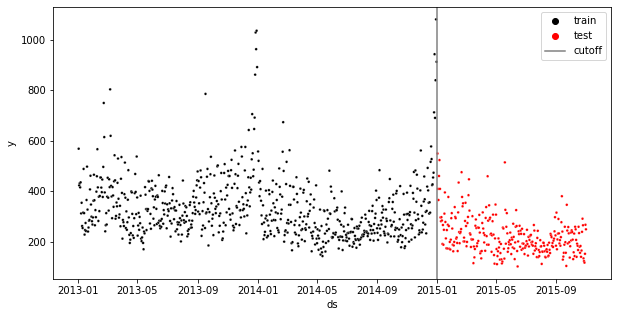

In [75]:
#@title
# for illustration purposes only
cutoff = pd.to_datetime('2015-01-01')
daily_total_qty['type'] = daily_total_qty['ds'].apply(
    lambda date: 'train' if date < cutoff else 'test')

plt.figure(figsize=(10, 5))
sns.scatterplot(x='ds', y='y', hue='type', s=7,
                palette=['black', 'red'],
                data=daily_total_qty)
plt.axvline(x=cutoff, color='gray', label='cutoff')
plt.legend()
plt.show()


We can split at a cutoff using conditional subsetting as below:

In [76]:
train = daily_total_qty[daily_total_qty['ds'] < cutoff]
test = daily_total_qty[daily_total_qty['ds'] >= cutoff]

print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (728, 3)
Test size: (303, 3)


Now let's train the model using data from 2013-2014 only, and forecast **303 days** into the future (until October 31st, 2015).

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



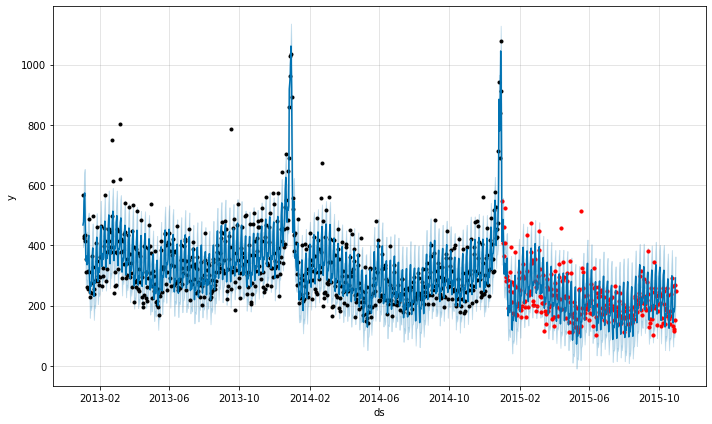

In [77]:
# fitting model
model_final = Prophet(
    holidays=holiday, # holiday effect
    yearly_seasonality=True)
model_final.add_seasonality(name='monthly', period=30.5, fourier_order=5) # add monthly seasonality
model_final.fit(train) # only training set

# forecasting
future_final = model_final.make_future_dataframe(periods=303, freq='D') # 303 days (test size)
forecast_final = model_final.predict(future_final)

# visualize
fig = model_final.plot(forecast_final)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

### Evaluation Metrics

Based on the plot above, we can see that the model is capable in forecasting the actual future value. But for most part, we will need to quantify the error to be able to have a conclusive result. To quantify an error, we need to calculate the **difference between actual demand and the forecasted demand**. However, there are several metrics we can use to express the value. Some of them are:

- Root Mean Squared Error

<center>
$RMSE = \displaystyle{\sqrt{\frac{1}{n} \sum_{i=1}^{n}{(p_i - a_i)^2}}}$
</center>

- Mean Squared Error
<center>
$SSE = \Sigma{(y-\hat y)^2}$  
</center>

- Mean Precentage Absoulute Error
<center>
$MAPE = \frac{1}{n}\Sigma{\frac{| y-\hat y|}{y}} \times 100\%$  
</center>

Each of the metrics above are commonly used in evaluating forecasting model. The idea of choosing the error metrics is by understanding what is being quantified. Any of the metrics can be used to benchmark a forecasting model, as long as we are consistent in using it. The summary of the 3 models is listed as follow:

- RMSE, shorts for Root mean squared error, are common quantifier for calculating numerical error. It is averaging the amount of squared error before then find the root to gain the original average unit for the error 
- SSE, shorts for sum squared error are an error that requires a minimal amount of computation resources. It gives an adequate information in benchmarking model, but not so much in interpreting the value 
- MAPE, shorts for mean absolute percentage error, is common to see in evaluating time series model. It gives the average percentage over the actual value range. In this course, we are going to use MAPE for better interpretability. However, do note one of the downside in using MAPE is that it requires no zero value since the formula needs to divide the error using its actual value. Since we our data has no 0 value in the series, we will proceed to calculate the error. The MAPE is often used in practice because of its very intuitive interpretationin terms of relative error.  The use of the MAPE is relevant in finance, for instance,as gains and losses are often measured in relative values. To acquire the error, we will need to subtract the actual value within `test` data frame using the forecasted value stored under `yhat` column in `forecast_final` data frame:

In [78]:
from sklearn.metrics import mean_absolute_percentage_error

forecast_train = forecast_final[forecast_final['ds'] < cutoff]
train_mape = mean_absolute_percentage_error(y_true=train['y'],
                                     y_pred=forecast_train['yhat'])
train_mape

0.14011438206595314

In [79]:
forecast_test = forecast_final[forecast_final['ds'] >= cutoff]
test_mape = mean_absolute_percentage_error(y_true=test['y'],
                                     y_pred=forecast_test['yhat'])
test_mape

0.2966660078149105

### Expanding Window Cross Validation

Instead of only doing one time train-test split, we can do cross validation as shown below:

<center>
<img src="https://drive.google.com/uc?export=view&id=1HBE_VPCmJCn5QCt8ZIPIgqd3QPwUgS7R" width="400">
</center>

This cross validation procedure is called as **expanding window** and can be done automatically by using the `cross_validation()` method. There are three parameters to be specified:

- `initial`: the length of the initial training period
- `horizon`: forecast length
- `period`: spacing between cutoff dates

In [80]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_holiday, initial='730 days', horizon='30 days', period='90 days')
df_cv

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-01-04 00:00:00 and 2015-10-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-05,289.319703,211.161280,366.025534,460.0,2015-01-04
1,2015-01-06,315.899431,239.625121,397.928497,523.0,2015-01-04
2,2015-01-07,288.710734,212.367761,366.210273,409.0,2015-01-04
3,2015-01-08,286.511063,211.445758,367.276351,296.0,2015-01-04
4,2015-01-09,358.439974,271.490130,432.085830,281.0,2015-01-04
...,...,...,...,...,...,...
115,2015-10-27,182.493063,103.750582,254.767679,123.0,2015-10-01
116,2015-10-28,173.234940,91.312886,251.307980,117.0,2015-10-01
117,2015-10-29,186.225568,108.616358,265.387191,152.0,2015-10-01
118,2015-10-30,269.230244,189.127651,349.798735,267.0,2015-10-01


The cross validation process above will be carried out for 4 folds, where at each fold a forecast will be made for the next 30 days (`horizon`) from the cutoff dates. Below is the illustration for each fold:

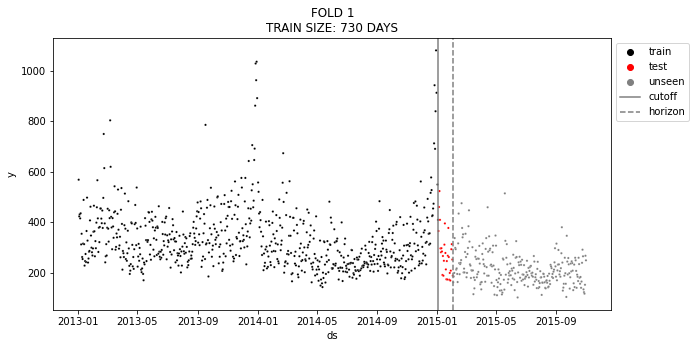

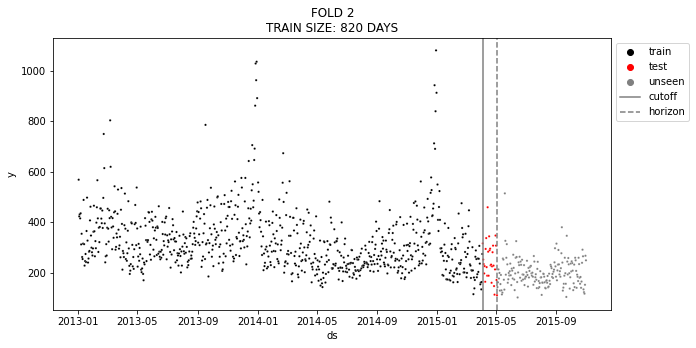

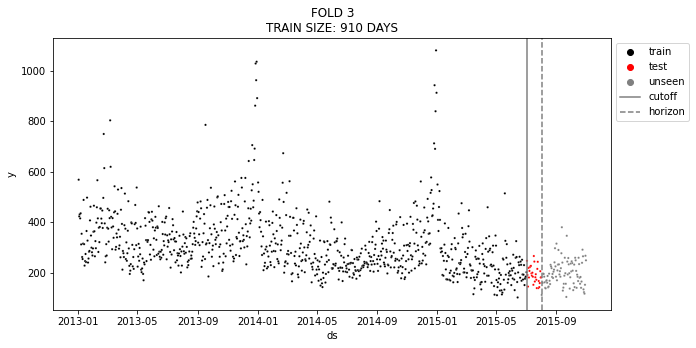

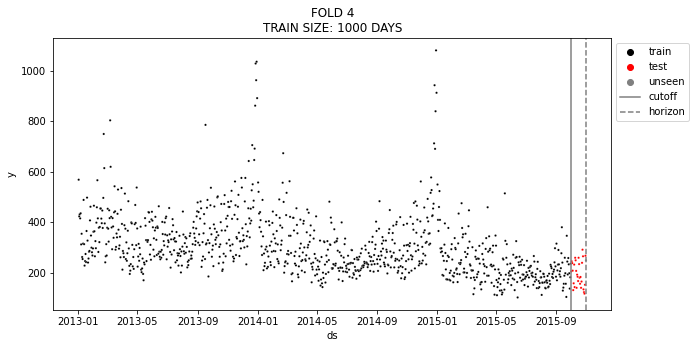

In [81]:
# for illustration purposes only
df_copy = daily_total_qty[['ds', 'y']].copy()
df_cutoff_horizon = df_cv.groupby('cutoff')[['ds']].max()

for i, (cutoff, horizon) in enumerate(df_cutoff_horizon.iterrows()):
  horizon_cutoff = horizon['ds']

  df_copy['type'] = df_copy['ds'].apply(
      lambda date: 'train' if date < cutoff else 
                   'test' if date < horizon_cutoff else 'unseen')
  
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x='ds', y='y', hue='type', s=5,
                  palette=['black', 'red', 'gray'],
                  data=df_copy)
  plt.axvline(x=cutoff, color='gray', label='cutoff')
  plt.axvline(x=horizon_cutoff, color='gray', ls='--', label='horizon')
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
  plt.title(f"FOLD {i+1}\nTRAIN SIZE: {df_copy['type'].value_counts()['train']} DAYS")
  plt.show()

Cross validation error metrics can be evaluated for each folds, here shown for MAPE.

In [82]:
cv_mape = df_cv.groupby('cutoff').apply(
    lambda x: mean_absolute_percentage_error(y_true=x['y'],
                                     y_pred=x['yhat']))
cv_mape

cutoff
2015-01-04    0.177804
2015-04-04    0.222921
2015-07-03    0.214745
2015-10-01    0.179063
dtype: float64

We can aggregate the metrics by using its mean. In other words, we are calculating the **mean of MAPE** to represent the overall model performance.

In [83]:
cv_mape.mean()

0.19863322912383416

## Hyperparameter Tuning

In this section, we implement a **Grid search algorithm** for model tuning by using for-loop. It builds model for every combination from specified hyperparameters and then evaluate it. The goal is to choose a set of optimal hyperparameters which minimize the forecast error (in this case, smallest MAPE).

💡 You can use the code template below, please change it as needed in the section marked by `TO DO`.


Click [here](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) for a list of recommended hyperparameters to be tuned.

In [84]:
from tqdm import tqdm
import itertools

# Grid search parameters (TO DO: specify possible values)
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1],
    'changepoint_range': [0.8, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mape = []  # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in tqdm(all_params):
  # fitting model
  # (TO DO: change the data and add other components: seasonality, holiday, regressor)
  model = Prophet(**params,
                  holidays=holiday)
  model.fit(daily_total_qty)

  # Expanding window cross validation (TO DO: use different values)
  cv = cross_validation(model, initial='730 days', horizon='30 days', period='90 days')
  
  # Evaluation metrics: MAPE
  mape_s = cv.groupby('cutoff').apply(
      lambda x: mean_absolute_percentage_error(y_true=x['y'],
                                     y_pred=x['yhat']))
  
  mean_mape = mape_s.mean()
  mape.append(mean_mape)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-01-04 00:00:00 and 2015-10-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method 

We can observe the error metrics for each hyperparameter combination, and sort by ascending:

In [85]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape
tuning_results.sort_values(by='mape')

,changepoint_prior_scale,changepoint_range,mape
6,0.100,0.80,0.195712
7,0.100,0.95,0.197463
4,0.050,0.80,0.198633
5,0.050,0.95,0.198818
3,0.010,0.95,0.203599
2,0.010,0.80,0.205165
0,0.001,0.80,0.240504
1,0.001,0.95,0.246481


Best hyperparameter combination can be extracted as follows:

In [86]:
import numpy as np

best_params = all_params[np.argmin(mape)]
best_params

{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8}

Lastly, re-fit the model and use it for forecasting.

In [87]:
model_best = Prophet(**best_params, holidays=holiday)
model_best.fit(daily_total_qty)
model_best

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dyahn\anaconda3\envs\taspen\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



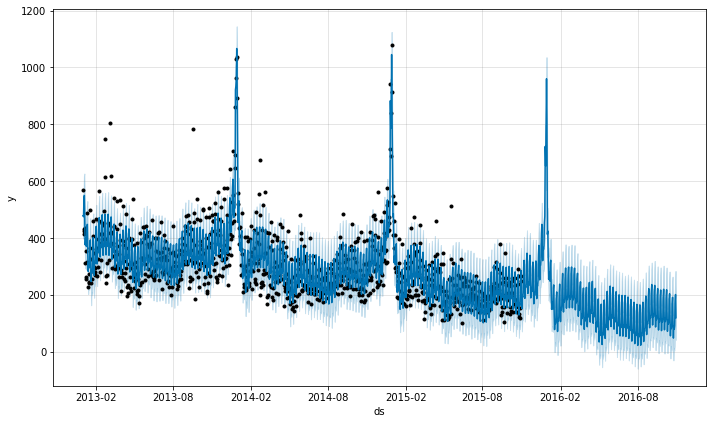

In [88]:
future_best = model_best.make_future_dataframe(periods=365, freq='D')
forecast_best = model_best.predict(future_best)

fig = model_best.plot(forecast_best)

# References

Prophet related:

- [Prophet Documentation](https://facebook.github.io/prophet/docs/quick_start.html)
- [Paper: Forecasting at Scale](https://peerj.com/preprints/3190/)
- [Algoritma: Time Series Forecasting using `prophet` in R](https://business-forecasting.netlify.app/#5_time_series_forecasting_using_prophet)
- [Algoritma: Time Series Forecasting using `prophet` in Python](https://github.com/tomytjandra/tsf-prophet)


Further reading (for R):

- [Textbook Forecasting: Principles and Practice](https://otexts.com/fpp2/)
- [Algotech: Multiple Seasonality Time Series](https://algotech.netlify.app/blog/multiple-seasonal/)
- [Algotech: Time Series LSTM (Neural Network)](https://algotech.netlify.app/blog/time-series-prediction-with-lstm/)